<a href="https://colab.research.google.com/github/Snehadevop/devopss/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training Shape: (50000, 32, 32, 3)
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 96ms/step - accuracy: 0.3310 - loss: 1.8274 - val_accuracy: 0.5202 - val_loss: 1.3637
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 90ms/step - accuracy: 0.5331 - loss: 1.2973 - val_accuracy: 0.5639 - val_loss: 1.2220
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 89ms/step - accuracy: 0.6114 - loss: 1.1018 - val_accuracy: 0.6052 - val_loss: 1.1014
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.6503 - loss: 0.9931 - val_accuracy: 0.6459 - val_loss: 1.0125
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 90ms/step - accuracy: 0.6837 - loss: 0.8955 - val_accuracy: 0.6586 - val_loss: 0.9734
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 89ms/step - accuracy: 0.7067 - loss: 0.8347 - val_accuracy: 0.6792 - val_loss: 0.9178
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 89ms/step - accuracy: 0.7250 - loss: 0.7703 - val_accuracy: 0.6864 - val_loss: 0.9099
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 90ms/step -

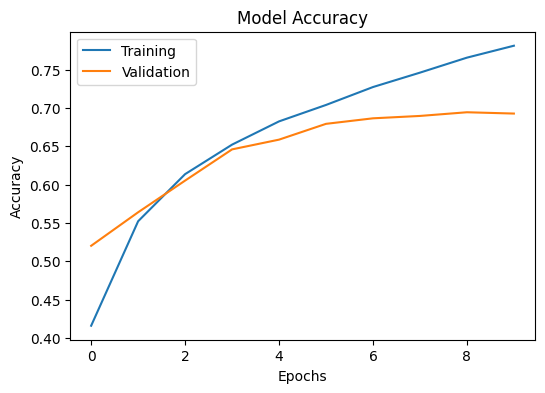

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step

Predicted Class for First Test Image: cat


In [9]:
# Import Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 Dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values (0-255 → 0-1)
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']

print("Training Shape:", X_train.shape)

# Build CNN Model
cnn_model = models.Sequential()

# Convolution Block 1
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn_model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Convolution Block 2
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Convolution Block 3
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Fully Connected Layers
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(128, activation='relu'))
cnn_model.add(layers.Dense(10, activation='softmax'))

# Compile Model
cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train Model
training_history = cnn_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)

# Evaluate Model
loss, accuracy = cnn_model.evaluate(X_test, y_test)
print("\nFinal Test Accuracy:", accuracy)

# Plot Accuracy Graph
plt.figure(figsize=(6,4))
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training", "Validation"])
plt.show()

# Predict First Test Image
pred = cnn_model.predict(X_test[:1])
predicted_label = labels[pred.argmax()]

print("\nPredicted Class for First Test Image:", predicted_label)